# Project 1 - Employee Salary Prediction

Column details:
1. `experience` - how much experience does the employee have
2. `test_score (out of 10)` - test score of the employee out of 10
3. `interview_score (out of 10)` – interview score of the employee out of 10

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Load the given dataset
df = pd.read_csv("Project 1_Employee_Salary_Analysis.csv")
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [3]:
df.head()

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   experience                  6 non-null      object 
 1   test_score(out of 10)       7 non-null      float64
 2   interview_score(out of 10)  8 non-null      int64  
 3   salary($)                   8 non-null      int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 384.0+ bytes


In [5]:
df.describe()

,test_score(out of 10),interview_score(out of 10),salary($)
count,7.000000,8.000000,8.00000
mean,7.857143,7.875000,63000.00000
std,1.345185,1.642081,11501.55269
min,6.000000,6.000000,45000.00000
25%,7.000000,6.750000,57500.00000
50%,8.000000,7.500000,63500.00000
75%,8.500000,9.250000,70500.00000
max,10.000000,10.000000,80000.00000


In [6]:
df.isnull().sum()

experience                    2
test_score(out of 10)         1
interview_score(out of 10)    0
salary($)                     0
dtype: int64

In [7]:
#Fill Null value of experience column with the value 0
df["experience"].fillna("zero", inplace=True)
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [8]:
#Replace the Null values of the column test score with mean value
df["test_score(out of 10)"].fillna(df["test_score(out of 10)"].mean(), inplace= True)
df["test_score(out of 10)"] = df["test_score(out of 10)"].round(2)
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.00,9,50000
1,zero,8.00,6,45000
2,five,6.00,7,60000
3,two,10.00,10,65000
4,seven,9.00,6,70000
5,three,7.00,10,62000
6,ten,7.86,7,72000
7,eleven,7.00,8,80000


In [9]:
df.rename(columns={"salary($)":"salary"}, inplace=True)
df

,experience,test_score(out of 10),interview_score(out of 10),salary
0,zero,8.00,9,50000
1,zero,8.00,6,45000
2,five,6.00,7,60000
3,two,10.00,10,65000
4,seven,9.00,6,70000
5,three,7.00,10,62000
6,ten,7.86,7,72000
7,eleven,7.00,8,80000


In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
labelencoder = LabelEncoder()

df['experience'] = labelencoder.fit_transform(df.experience)
df

,experience,test_score(out of 10),interview_score(out of 10),salary
0,6,8.00,9,50000
1,6,8.00,6,45000
2,1,6.00,7,60000
3,5,10.00,10,65000
4,2,9.00,6,70000
5,4,7.00,10,62000
6,3,7.86,7,72000
7,0,7.00,8,80000


# Scatter Plots

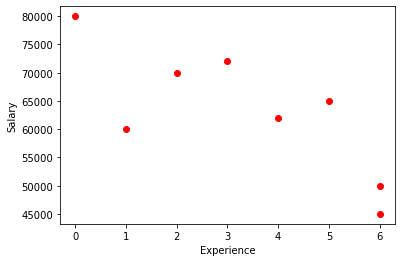

In [12]:
#Display a scatter plot between experience and Salary
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.scatter(df.experience,df.salary, marker='o', color='Red')
plt.show()

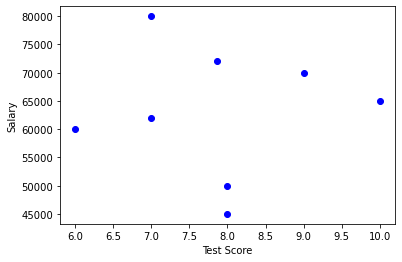

In [13]:
#Display a scatter plot between test score and Salary
plt.xlabel("Test Score")
plt.ylabel("Salary")
plt.scatter(df["test_score(out of 10)"],df.salary, marker='o', color='Blue')
plt.show()

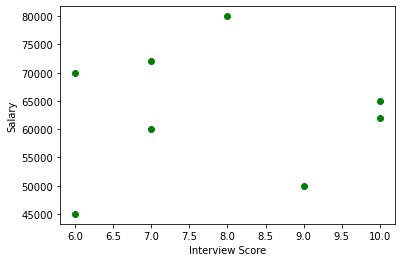

In [14]:
#Display a scatter plot between interview score and Salary
plt.xlabel("Interview Score")
plt.ylabel("Salary")
plt.scatter(df["interview_score(out of 10)"],df.salary, marker='o', color='Green')
plt.show()

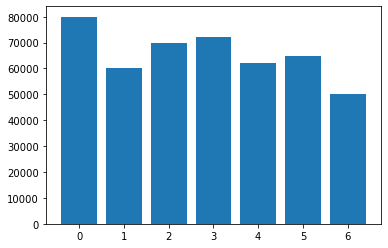

In [15]:
#Display bar plot for experience
plt.bar(df.experience,df.salary)
plt.show()

# Seperate the Data

In [16]:
#Separate feature data from target data
X = df.drop('salary', axis=1)
Y = df.salary
print(X)
print(Y)

   experience  test_score(out of 10)  interview_score(out of 10)
0           6                   8.00                           9
1           6                   8.00                           6
2           1                   6.00                           7
3           5                  10.00                          10
4           2                   9.00                           6
5           4                   7.00                          10
6           3                   7.86                           7
7           0                   7.00                           8
0    50000
1    45000
2    60000
3    65000
4    70000
5    62000
6    72000
7    80000
Name: salary, dtype: int64


# Data Splitting

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test= train_test_split(X,Y,test_size = 0.3, random_state = 42)

In [18]:
print(X_train)
print(X_test)

   experience  test_score(out of 10)  interview_score(out of 10)
7           0                   7.00                           8
2           1                   6.00                           7
4           2                   9.00                           6
3           5                  10.00                          10
6           3                   7.86                           7
   experience  test_score(out of 10)  interview_score(out of 10)
1           6                    8.0                           6
5           4                    7.0                          10
0           6                    8.0                           9


In [19]:
print(Y_train)
print(Y_test)

7    80000
2    60000
4    70000
3    65000
6    72000
Name: salary, dtype: int64
1    45000
5    62000
0    50000
Name: salary, dtype: int64


# Create a Linear regression model between Features and target data

In [20]:
from sklearn.linear_model import LinearRegression
linearmodel = LinearRegression()
linearmodel.fit(X_train, Y_train)

LinearRegression()

In [21]:
print("Training Accuracy:",linearmodel.score(X_train,Y_train))
print("Testing Accuracy:",linearmodel.score(X_test,Y_test))

Training Accuracy: 0.4610685236958306
Training Accuracy: 0.7970429506938435


In [22]:
Y_preds = linearmodel.predict(X_test)
Y_preds

array([49043.66377099, 59068.73286283, 52457.89187553])

In [23]:
Y_test

1    45000
5    62000
0    50000
Name: salary, dtype: int64

# Slope, Intercept, MSE, MAE, RMSE

In [41]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import math
print("Test Accuraccy: ", linearmodel.score(X_test,Y_test))
print("Train Accuraccy: ", linearmodel.score(X_train,Y_train))

Test Accuraccy:  0.7970429506938435
Train Accuraccy:  0.4610685236958306


In [43]:
mse = mean_squared_error(Y_test,Y_preds)
mae = mean_absolute_error(Y_test,Y_preds)
rmse = math.sqrt(mse)
r2 = r2_score(Y_test,Y_preds)

In [45]:
print("slope: ",linearmodel.coef_)
print("intercept",linearmodel.intercept_)
print("Mean Squared Error: ", mse)
print("Mean Absolute Error: ", mae)
print("Root Mean Squared Error: ", rmse)
print("R2 Score", r2)

slope:  [-4909.76953915  4346.77412585  1138.07603485]
intercept 36899.63178999831
Mean Squared Error:  10328258.731357746
Mean Absolute Error:  3144.2742612304405
Root Mean Squared Error:  3213.7608391661233
R2 Score 0.7970429506938435
